# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

<font color='blue'>

## Подготовка данных

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.dummy import DummyRegressor

In [3]:

df_train=pd.read_csv('/datasets/gold_recovery_train_new.csv')
df_test=pd.read_csv('/datasets/gold_recovery_test_new.csv')
df_full=pd.read_csv('/datasets/gold_recovery_full_new.csv')


In [4]:
def df_info(df):
    display(df.info)
    print()
    display(df.describe())
    print()
    display(df.head(20))
    print()
    print(df.duplicated().sum())
    print()
    print(df.isna().sum())
    

In [5]:
df_info(df_train)

<bound method DataFrame.info of                       date  final.output.concentrate_ag  \
0      2016-01-15 00:00:00                     6.055403   
1      2016-01-15 01:00:00                     6.029369   
2      2016-01-15 02:00:00                     6.055926   
3      2016-01-15 03:00:00                     6.047977   
4      2016-01-15 04:00:00                     6.148599   
...                    ...                          ...   
14144  2018-08-18 06:59:59                     3.224920   
14145  2018-08-18 07:59:59                     3.195978   
14146  2018-08-18 08:59:59                     3.109998   
14147  2018-08-18 09:59:59                     3.367241   
14148  2018-08-18 10:59:59                     3.598375   

       final.output.concentrate_pb  final.output.concentrate_sol  \
0                         9.889648                      5.507324   
1                         9.968944                      5.257781   
2                        10.213995                     

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855



0

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64


In [6]:
df_info(df_test)

<bound method DataFrame.info of                      date  primary_cleaner.input.sulfate  \
0     2016-09-01 00:59:59                     210.800909   
1     2016-09-01 01:59:59                     215.392455   
2     2016-09-01 02:59:59                     215.259946   
3     2016-09-01 03:59:59                     215.336236   
4     2016-09-01 04:59:59                     199.099327   
...                   ...                            ...   
5285  2017-12-31 19:59:59                     173.957757   
5286  2017-12-31 20:59:59                     172.910270   
5287  2017-12-31 21:59:59                     171.135718   
5288  2017-12-31 22:59:59                     179.697158   
5289  2017-12-31 23:59:59                     181.556856   

      primary_cleaner.input.depressant  primary_cleaner.input.feed_size  \
0                            14.993118                         8.080000   
1                            14.987471                         8.080000   
2                     

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
5,2016-09-01 05:59:59,168.485085,8.817007,7.420000,0.791191,1402.826803,-499.299521,1401.511119,-499.205357,1404.088107,...,12.029797,-499.814895,8.036586,-500.371492,8.041446,-510.037054,4.983949,-499.990990,24.978973,-500.475640
6,2016-09-01 06:59:59,144.133440,7.924610,7.420000,0.788838,1398.252401,-499.748672,1393.255503,-499.195380,1396.738566,...,12.026296,-499.473127,8.027984,-500.983079,7.907340,-507.964971,5.010224,-500.043697,25.040709,-499.501984
7,2016-09-01 07:59:59,133.513396,8.055252,6.988000,0.801871,1401.669677,-501.777839,1400.754446,-502.514024,1400.465244,...,12.040911,-501.293852,8.020490,-499.185229,8.116897,-511.927561,5.036498,-500.149615,25.032580,-503.970657
8,2016-09-01 08:59:59,133.735356,7.999618,6.935000,0.789329,1402.358981,-499.981597,1400.985954,-496.802968,1401.168584,...,11.998184,-499.481608,8.012610,-500.896783,7.974422,-521.199104,5.061599,-499.791519,25.005063,-497.613716
9,2016-09-01 09:59:59,126.961069,8.017856,7.030000,0.805298,1400.816120,-499.014158,1399.975401,-499.570552,1401.871924,...,12.040725,-499.987743,7.989503,-499.750625,7.989710,-509.946737,5.068811,-499.293900,24.992741,-499.272255



0

date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.fl

In [7]:
df_info(df_full)

<bound method DataFrame.info of                       date  final.output.concentrate_ag  \
0      2016-01-15 00:00:00                     6.055403   
1      2016-01-15 01:00:00                     6.029369   
2      2016-01-15 02:00:00                     6.055926   
3      2016-01-15 03:00:00                     6.047977   
4      2016-01-15 04:00:00                     6.148599   
...                    ...                          ...   
19434  2018-08-18 06:59:59                     3.224920   
19435  2018-08-18 07:59:59                     3.195978   
19436  2018-08-18 08:59:59                     3.109998   
19437  2018-08-18 09:59:59                     3.367241   
19438  2018-08-18 10:59:59                     3.598375   

       final.output.concentrate_pb  final.output.concentrate_sol  \
0                         9.889648                      5.507324   
1                         9.968944                      5.257781   
2                        10.213995                     

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855



0

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64


In [8]:
c = df_train['rougher.output.concentrate_au']
f = df_train['rougher.input.feed_au']
t = df_train['rougher.output.tail_au']

In [9]:
recovery = c * (f - t) / f / (c - t) * 100
recovery

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Length: 14149, dtype: float64

In [10]:
mae_recovery = mean_absolute_error(recovery, df_train['rougher.output.recovery'])
mae_recovery

1.0748911125799084e-14

MAE на низком уровне, что значит малое отклонение

In [11]:
delete_columns = list(set(df_train.columns) - set(df_test.columns))
delete_columns

['primary_cleaner.output.concentrate_ag',
 'secondary_cleaner.output.tail_ag',
 'rougher.calculation.sulfate_to_au_concentrate',
 'primary_cleaner.output.concentrate_au',
 'secondary_cleaner.output.tail_pb',
 'rougher.calculation.au_pb_ratio',
 'final.output.concentrate_ag',
 'rougher.output.concentrate_ag',
 'primary_cleaner.output.tail_au',
 'final.output.recovery',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'final.output.concentrate_pb',
 'rougher.output.tail_sol',
 'final.output.tail_pb',
 'final.output.tail_au',
 'final.output.tail_ag',
 'rougher.output.concentrate_sol',
 'rougher.output.tail_ag',
 'final.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'secondary_cleaner.output.tail_sol',
 'rougher.output.concentrate_au',
 'rougher.output.tail_au',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'final.output.concentrate_sol',
 'rougher.output.tail_pb',
 'rougher.output.concentrate_pb',
 'secondary_cleaner.output.tail_au',
 'final.output.tai

In [12]:
df_full[delete_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   primary_cleaner.output.concentrate_ag               19439 non-null  float64
 1   secondary_cleaner.output.tail_ag                    19437 non-null  float64
 2   rougher.calculation.sulfate_to_au_concentrate       19437 non-null  float64
 3   primary_cleaner.output.concentrate_au               19439 non-null  float64
 4   secondary_cleaner.output.tail_pb                    19427 non-null  float64
 5   rougher.calculation.au_pb_ratio                     19439 non-null  float64
 6   final.output.concentrate_ag                         19438 non-null  float64
 7   rougher.output.concentrate_ag                       19439 non-null  float64
 8   primary_cleaner.output.tail_au                      19439 non-null  float64


Можно увидеть, что недоступные признаки относятся к типу float, стоит отметить, что отсутствуют целевые столбцы rougher.output.recovery, final.output.recovery.

In [13]:
df_train.drop(delete_columns, axis=1, inplace=True)

Добавим недостающие данные из фулл датафрейма методом merge()

In [14]:
df_test = df_test.merge(df_full[['date', 'rougher.output.recovery', 'final.output.recovery']], how='left', on='date')
df_train = df_train.merge(df_full[['date', 'rougher.output.recovery', 'final.output.recovery']], how='left', on='date')

In [15]:
df_train = df_train.ffill()
df_test = df_test.ffill()

In [16]:
df_train.isna().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

In [17]:
df_test.isna().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

In [18]:
df_full.isna().sum()

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

В ходе предобработки данных были проанализированы три датафрейма, недостающие части из тестовой и обучающей выборках были заполнены данными из фул датафрейма. Также были заполнены пропуски в данных.

## Анализ данных

In [19]:
df_concentrate_au = df_full[['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']]

In [20]:
df_concentrate_au

,rougher.input.feed_au,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,final.output.concentrate_au
0,6.486150,19.793808,34.174427,42.192020
1,6.478583,20.050975,34.118526,42.701629
2,6.362222,19.737170,33.969464,42.657501
3,6.118189,19.320810,28.260743,42.689819
4,5.663707,19.216101,33.044932,42.774141
...,...,...,...,...
19434,5.335862,18.603550,32.940215,46.713954
19435,4.838619,18.441436,32.925325,46.866780
19436,4.525061,15.111231,31.856742,46.795691
19437,4.362781,17.834772,30.770892,46.408188


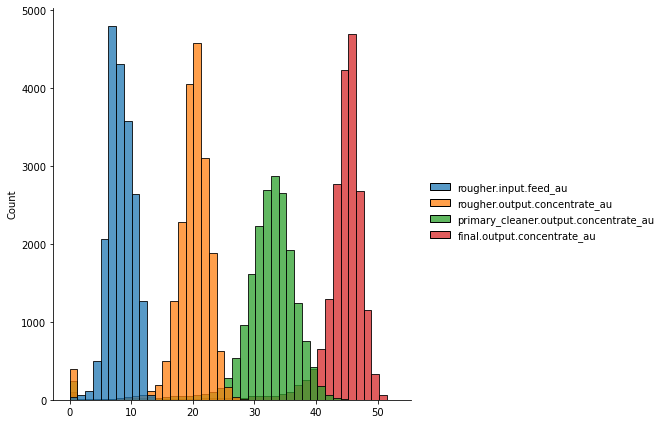

In [21]:
sns.displot(df_concentrate_au, fill=True, height=6)

<AxesSubplot:ylabel='Frequency'>

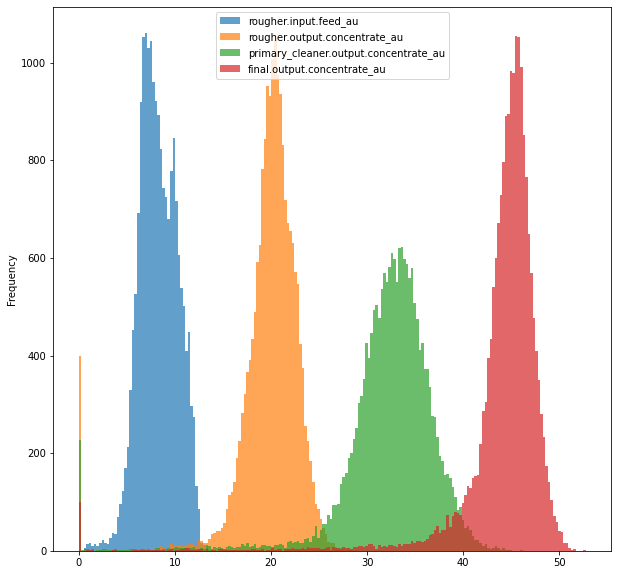

In [22]:
df_concentrate_au.plot.hist(
    figsize=(10, 10),
    alpha= 0.7,
    bins=200
)

Исходя из графиков мы видим, что на трех этапах очистки концентрация золота увеличивается

In [23]:
df_concentrate_au.describe()

,rougher.input.feed_au,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,final.output.concentrate_au
count,19439.000000,19439.000000,19439.000000,19439.000000
mean,8.266097,19.772000,32.119400,44.076513
std,1.955092,3.753600,5.627611,5.129784
min,0.010000,0.000000,0.000000,0.000000
25%,6.854384,18.802523,30.463140,43.402215
50%,8.125839,20.280214,32.841295,45.011244
75%,9.769917,21.717843,35.048006,46.275313
max,13.731330,28.824507,45.933934,52.756638


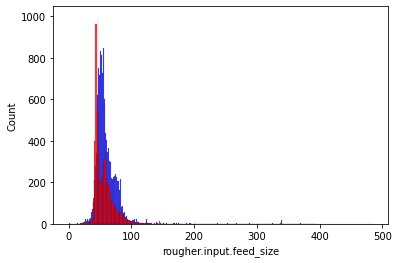

In [24]:
sns.histplot(df_train['rougher.input.feed_size'], color='blue');
sns.histplot(df_test['rougher.input.feed_size'], color='red');

 Распределение размеров гранул на обучающей и тестовой выборках

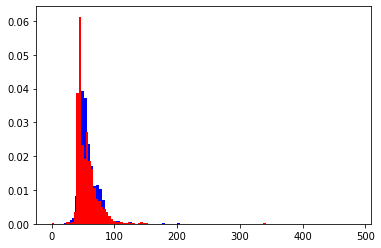

In [25]:
plt.hist(df_train['rougher.input.feed_size'], bins=100,density=True, color='blue');
plt.hist(df_test['rougher.input.feed_size'], bins=100,density=True, color='red');

In [26]:
df_feed_size = pd.concat([df_train['rougher.input.feed_size'], df_test['rougher.input.feed_size']], axis=1)
df_feed_size.describe()

,rougher.input.feed_size,rougher.input.feed_size
count,14149.000000,5290.000000
mean,60.239856,55.952754
std,23.005310,19.080334
min,9.659576,0.046369
25%,48.966751,43.906504
50%,55.269784,50.846843
75%,66.007526,62.451165
max,484.967466,392.494040


Исходя из графика и таблицы describe() можно сделать вывод, что размер гранул на обучающей и тестовой выборках отличается незначительно

<AxesSubplot:xlabel='df_concentrate_input', ylabel='Count'>

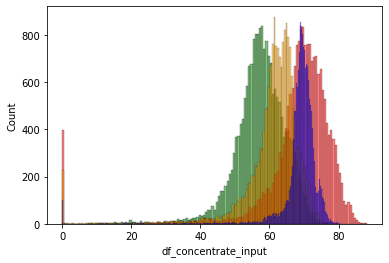

In [27]:
df_full['df_concentrate_input'] = df_full[['rougher.input.feed_au',
                                 'rougher.input.feed_ag',
                                 'rougher.input.feed_pb',
                                 'rougher.input.feed_sol']].sum(axis=1)
df_full['df_concentrate_output'] = df_full[['rougher.output.concentrate_au',
                                        'rougher.output.concentrate_ag',
                                        'rougher.output.concentrate_pb',
                                         'rougher.output.concentrate_sol']].sum(axis=1)
df_full['df_concentrate_primary_cleaner'] = df_full[['primary_cleaner.output.concentrate_au',
                                                 'primary_cleaner.output.concentrate_ag',
                                                 'primary_cleaner.output.concentrate_pb',
                                                 'primary_cleaner.output.concentrate_sol']].sum(axis=1)
df_full['df_concentrate_final'] = df_full[['final.output.concentrate_au',
                                       'final.output.concentrate_ag',
                                       'final.output.concentrate_pb',
                                       'final.output.concentrate_sol']].sum(axis=1)
sns.histplot(df_full['df_concentrate_input'], color='green', alpha=.5)
sns.histplot(df_full['df_concentrate_output'], color='red', alpha=.5)
sns.histplot(df_full['df_concentrate_primary_cleaner'], color='orange', alpha=.5)
sns.histplot(df_full['df_concentrate_final'], color='blue', alpha=.5)

удалим малочисленные значения в данных

In [28]:
for y in df_concentrate_au:
    df_concentrate_au = df_concentrate_au.drop(df_concentrate_au.loc[df_concentrate_au[y] < 1].index)
    df_full = df_full.drop(df_full.loc[df_full[y] < 1].index)

In [29]:
df_concentrate_au.describe()


,rougher.input.feed_au,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,final.output.concentrate_au
count,18714.000000,18714.000000,18714.000000,18714.000000
mean,8.274383,20.206515,32.488024,44.302603
std,1.925297,2.425352,4.348960,3.943766
min,1.025235,1.889855,1.004621,1.063992
25%,6.848150,18.945836,30.543715,43.425918
50%,8.129623,20.342178,32.851581,45.010115
75%,9.770743,21.768199,35.038336,46.257638
max,13.731330,28.824507,45.933934,51.571885


<AxesSubplot:xlabel='df_concentrate_input', ylabel='Count'>

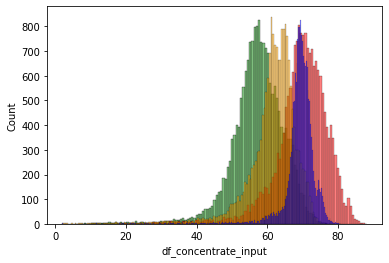

In [30]:
sns.histplot(df_full['df_concentrate_input'], color='green', alpha=.5)
sns.histplot(df_full['df_concentrate_output'], color='red', alpha=.5)
sns.histplot(df_full['df_concentrate_primary_cleaner'], color='orange', alpha=.5)
sns.histplot(df_full['df_concentrate_final'], color='blue', alpha=.5)

## Модель

def smape(targets, predictions):
    fraction = abs(targets - predictions) / ((abs(targets) + abs(predictions)) / 2)   
    sum_fraction = fraction.sum()
    smape = (1 / len(targets)) * sum_fraction * 100
    return smape + 0.0000000001 

def final_smape(smape_rougher, smape_final):
    final_smape = 0.25 * smape_rougher + 0.75 * smape_final
    return final_smape

In [31]:
def smape(targets, predictions):
    error = abs(targets - predictions)
    scale = (abs(targets) + abs(predictions)) / 2 + 0.000000001
    result = (error / scale).mean()
    return result * 100


def final_smape(targets, predictions):
    targets.reset_index(drop=True, inplace=True)
    predictions = pd.DataFrame(data=predictions)
    rougher = smape(targets.iloc[:, 0], predictions.iloc[:, 0])
    final = smape(targets.iloc[:, 1], predictions.iloc[:, 1])
    return 0.25 * rougher + 0.75 * final

In [32]:
features_train = df_train.drop(['date', 'final.output.recovery','rougher.output.recovery'], axis=1)
target_train = df_train[['final.output.recovery', 'rougher.output.recovery']]

features_test = df_test.drop(['date', 'final.output.recovery','rougher.output.recovery'], axis=1)
target_test = df_test[['final.output.recovery', 'rougher.output.recovery']]


In [33]:
scaler = StandardScaler()
scaler.fit(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

Для целей исследования есть смысл брать модели регрессии:
LinearRegression()
DecisionTreeRegressor()
RandomForestRegressor()


In [34]:
scorers = make_scorer(final_smape, greater_is_better=False)

In [35]:
%%time

model_lr = LinearRegression()
model_lr.fit(features_train, target_train)
result_lr = cross_val_score(model_lr, features_train, target_train, cv=5, scoring=scorers).mean()
result_lr 

CPU times: user 861 ms, sys: 835 ms, total: 1.7 s
Wall time: 1.69 s


-12.663187673727649

In [36]:
%%time
best_depth_tree = None
best_result = -999
best_model = None
for depth in (1,30):
    model_tree = DecisionTreeRegressor(max_depth=depth,random_state=12345)
#    model_tree.fit(features_train,target_train)
    result=cross_val_score(model_tree, features_train, target_train, cv=5, scoring=scorers).mean()
    if result > best_result:
        best_depth = depth
        best_result = result
print(best_depth_tree)
print(best_result)

None
-12.426976761990254
CPU times: user 6.06 s, sys: 17.7 ms, total: 6.07 s
Wall time: 6.15 s


In [37]:
%%time
best_result = -999
best_depth = None
best_model = None

for depth in range(1, 16, 1):
    model =  RandomForestRegressor(n_estimators=20, max_depth=depth, random_state=12345)
#    model.fit(features_train, target_train)
    result = cross_val_score(model, features_train, target_train, cv=5, scoring=scorers).mean()
    if result > best_result:
        best_result = result
        best_depth = depth
        best_model = model
print(best_result)
print(best_depth)
print(best_model)
print()
print(result)

-10.907505363003724
5
RandomForestRegressor(max_depth=5, n_estimators=20, random_state=12345)

-13.252229134616442
CPU times: user 7min 20s, sys: 387 ms, total: 7min 21s
Wall time: 7min 24s


In [38]:
%%time
best_result = -999
best_est = None
best_model = None

for est in range(1, 80, 2):
    model =  RandomForestRegressor(n_estimators=est, max_depth=5, random_state=12345)
#    model.fit(features_train, target_train)
    result = cross_val_score(model, features_train, target_train, cv=5, scoring=scorers).mean()
    if result > best_result:
        best_result = result
        best_depth = depth
        best_model = model
print(best_result)
print(best_est)
print(best_model)
print()
print(result)

-10.721184895792899
None
RandomForestRegressor(max_depth=5, n_estimators=55, random_state=12345)

-10.739489215257445
CPU times: user 27min 10s, sys: 1.47 s, total: 27min 12s
Wall time: 27min 23s


Таким образом, можно увидеть, что модель RandomForestRegressor(max_depth=5, n_estimators=55, random_state=12345) показала наилучшие результаты

In [39]:
model_rfr = RandomForestRegressor(max_depth=5, n_estimators=55, random_state=12345)
model_rfr.fit(features_train, target_train)
predictions = model_rfr.predict(features_test)

In [40]:
print(smape(target_test, predictions))

final.output.recovery      9.266537
rougher.output.recovery    8.808431
dtype: float64


In [41]:
final_smape(target_test, predictions)

8.922957832412127

In [42]:
model_dummy = DummyRegressor(strategy='mean')
model_dummy.fit(features_train, target_train)
predictions_dummy = model_dummy.predict(features_test)
predictions_dummy

array([[66.51883213, 82.70450165],
       [66.51883213, 82.70450165],
       [66.51883213, 82.70450165],
       ...,
       [66.51883213, 82.70450165],
       [66.51883213, 82.70450165],
       [66.51883213, 82.70450165]])

In [43]:
smape(target_test, predictions_dummy)

final.output.recovery      10.259574
rougher.output.recovery    10.379799
dtype: float64

In [44]:
final_smape(target_test,  predictions_dummy)

10.34974298079406

Модель выдержала проверку на адекватность

В результате исследования была проведена предобработка данных методом merge() недостающие колонки в тестовом и обучающем датафрейме были заполнены из полного датафрейма, методом ffill() были заполнены пропуски в данных.

Далее было проанализирована концентрация золота на каждом этапе очистики, оказалось что концентрация золота увеличивается от этапа к этапу.

После выяснилось, что распределение размеров гранул на обучающей и тестовой выборках примерно равно.

Затем была надена и обучена оптимальная модель (RandomForestRegressor(max_depth=5, n_estimators=55, random_state=12345)).

В итоге вычеслено финальное smape (8.926165595106212), что говорит о неплохом результате, также успешно проведена проверка на адекватность моделью Dummy Regressor()
.

